In [1]:
import sys
sys.path.append("../")
from src.preprocess.word_embedding_features import sentence_level_preprocess
import gensim.downloader
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint
from keras.layers import GRU, AvgPool1D, Dense, Masking
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
embedding_table = gensim.downloader.load("glove-wiki-gigaword-50")

In [3]:
model = load_model("outputs/sentence_level_preprocess-checkpoints")

In [4]:
from src.preprocess.common import load_data
def get_datasets(data_path: str = "../Data/C50") -> pd.DataFrame:
    df_test = load_data(f"{data_path}/C50test", 50)
    df_train = load_data(f"{data_path}/C50train", 50)
    return df_train.append(df_test, ignore_index=True)
df = get_datasets()

In [40]:
label_mapper = dict(zip(df["author_name"],pd.Categorical(df["author_name"]).codes))

In [6]:
X = df["book_text"].values
y = pd.Categorical(df["author_name"]).codes

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from src.preprocess.complexStyleFeatures import *
from src.preprocess.simpleStyleFeatures import *
import swifter
x_train_style = pd.DataFrame(X_train, columns=['book_text'])
x_test_style = pd.DataFrame(X_test, columns=['book_text'])
x_train_style1, x_test_style1 = complex_style_features_extraction(x_train_style, x_test_style)
x_train_style2, x_test_style2 = simple_style_features_extraction(x_train_style, x_test_style)
x_train_style = pd.concat([x_train_style1, x_train_style2], axis=1)
x_test_style = pd.concat([x_test_style1, x_test_style2], axis=1)
keep_index = (x_train_style != 0).any()
x_train_style = x_train_style.loc[:, keep_index.values]
x_test_style = x_test_style.loc[:, keep_index.values]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
import pickle
with open("outputs/RandomForestStyle.sav","rb") as file:
    random_forest = pickle.load(file)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [34]:
x_train_style = x_train_style.drop(["@"],axis=1)
x_test_style = x_test_style.drop(["@"],axis=1)

In [55]:
from tqdm import tqdm
probs_right = []
probs_wrong = []
correct = 0
for main_text,style_text,label in tqdm(zip(X_test,x_test_style.values,y_test)):
    pred = model.predict(np.expand_dims(sentence_level_preprocess(main_text, embedding_table), axis=0))
#     max_prob = pred.max()
    pred = pred.argmax()
#     if pred == label:
#         probs_right.append(max_prob)
#     else:
#         probs_wrong.append(max_prob)
#     if max_prob < 0.9:
#         pred = random_forest.predict(np.expand_dims(style_text,axis=0))[0]
#         pred = label_mapper[pred]
    correct += (pred == label).sum()
print(correct / y_test.shape[0])

1000it [00:47, 21.10it/s]

0.956


In [56]:
probs = []
correct = 0
for main_text,style_text,label in tqdm(zip(X_train,x_train_style.values,y_train)):
    pred = model.predict(np.expand_dims(sentence_level_preprocess(main_text, embedding_table), axis=0))
#     max_prob = pred.max()
    pred = pred.argmax()
#     probs.append(max_prob)
#     if max_prob < 0.9:
#         pred = random_forest.predict(np.expand_dims(style_text,axis=0))[0]
#         pred = label_mapper[pred]
    correct += (pred == label).sum()
print(correct / y_test.shape[0])

4000it [03:12, 20.73it/s]

3.837


In [57]:
print(correct / y_train.shape[0])

0.95925


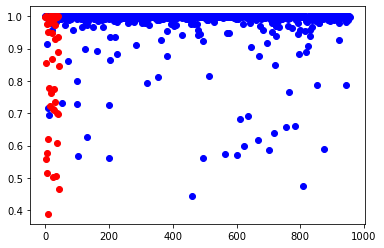

In [54]:
import matplotlib.pyplot as plt
plt.scatter(list(range(len(probs_right))),probs_right,c="blue")
plt.scatter(list(range(len(probs_wrong))),probs_wrong,c="red")